In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv('testdata/Pokemon.csv', index_col=0)

In [4]:
df.sample(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
61,Poliwhirl,Water,NaN,385,65,65,65,50,50,90,2,False
37,Vulpix,Fire,NaN,299,38,41,40,50,65,65,1,False
44,Gloom,Grass,Poison,395,60,65,70,85,75,40,2,False
75,Graveler,Rock,Ground,390,55,95,115,45,45,35,2,False
115,Kangaskhan,Normal,NaN,490,105,95,80,40,80,90,1,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
Sp. Atk      151 non-null int64
Sp. Def      151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


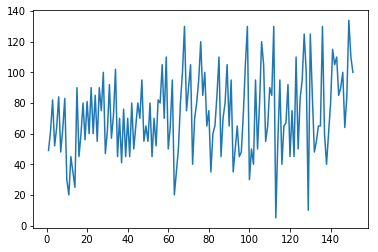

In [6]:
# univariate graph
plt.plot(df.Attack)

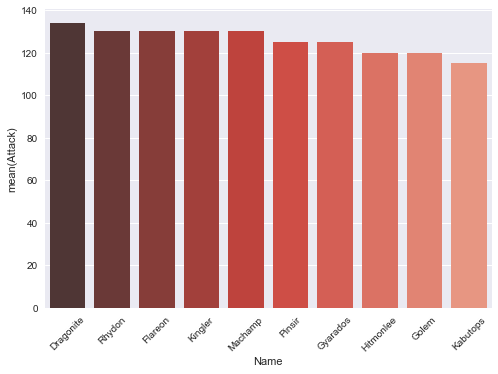

In [19]:
# bar plot / histogram
# Top 10 attack Pokemons
to_10_atk = df[['Attack','Name']].groupby( 'Name', as_index=False ).sum().sort_values( 'Attack', ascending=False ).head(10)

plt.xticks( rotation=45 )
sns.barplot( x='Name', y='Attack', data=to_10_atk, palette="Reds_d" )

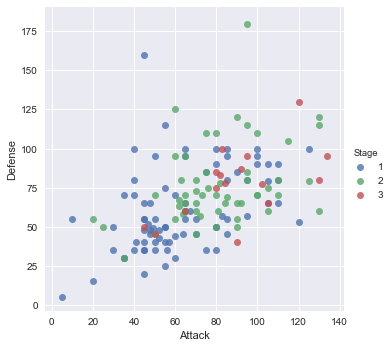

In [20]:
# scatter plot

sns.lmplot(x='Attack', y='Defense', data=df
           , fit_reg=False # no regression line
           , hue='Stage' # color by Stage col
          )

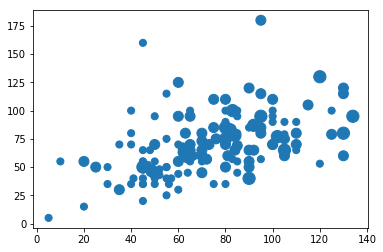

In [8]:
# compare with
plt.scatter( x='Attack', y='Defense', data=df, s=df.Stage*50 )

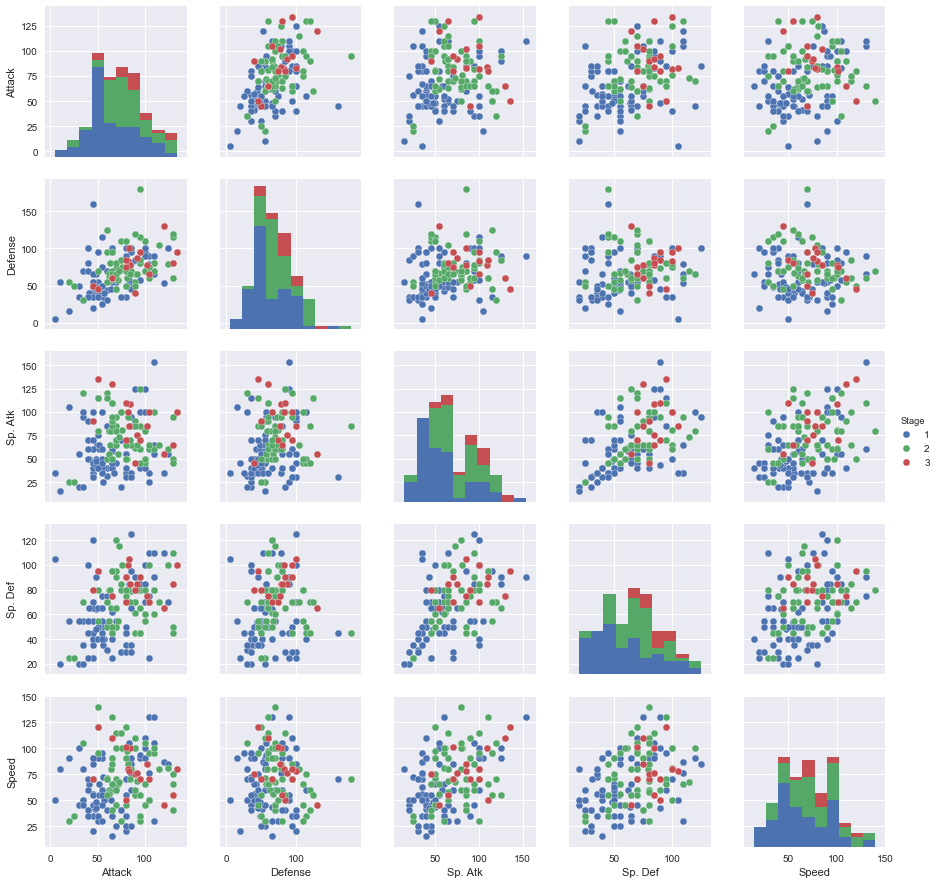

In [6]:
# scatter plot matrix

sns.pairplot( data=df, vars=('Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'), hue='Stage')

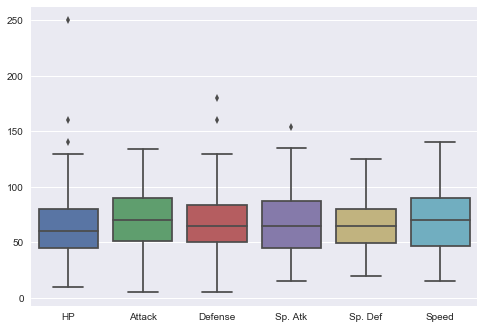

In [13]:
# box plot

stats_df = df.drop( ['Total', 'Stage', 'Legendary'], axis=1 )
sns.boxplot( data=stats_df )

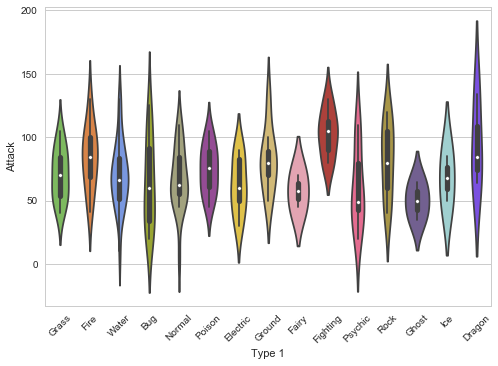

In [43]:
# Set theme
sns.set_style('whitegrid') # background color
#sns.set_style('darkgrid')

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

plt.xticks(rotation=45)
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df
              , palette=pkmn_type_colors # set color scheme
              )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

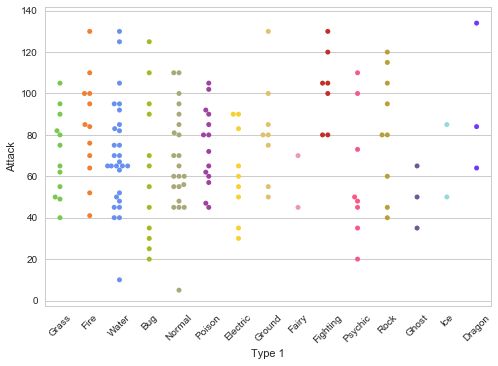

In [30]:
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)
plt.xticks(rotation=45)

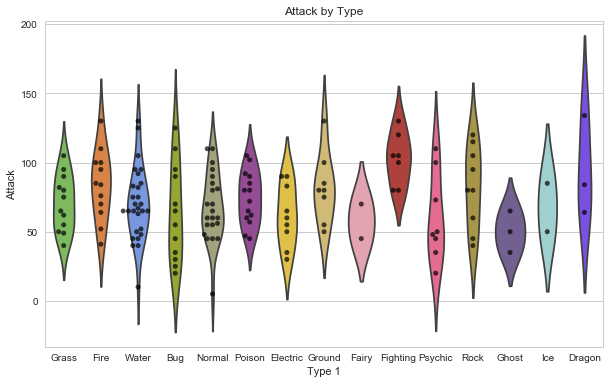

In [20]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

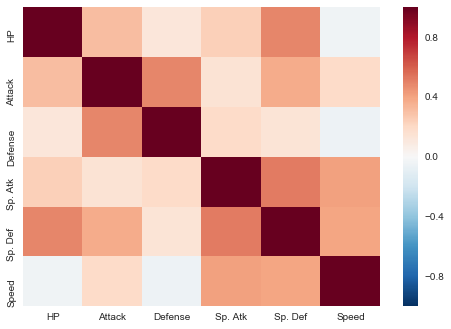

In [25]:
# Calculate correlations
# how a value changes for b in comparison to value a
# 1 is perfect increase of b in response to increase of a
# -1 is perfect decrease of b "
corr = stats_df.corr()

# Heatmap
sns.heatmap( corr )

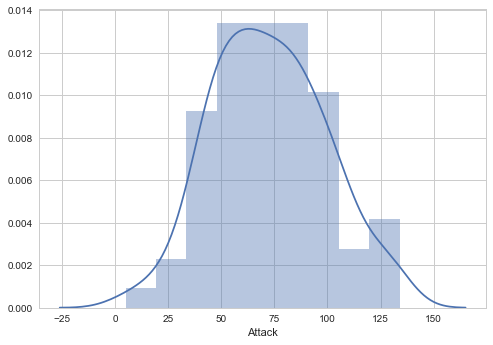

In [26]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

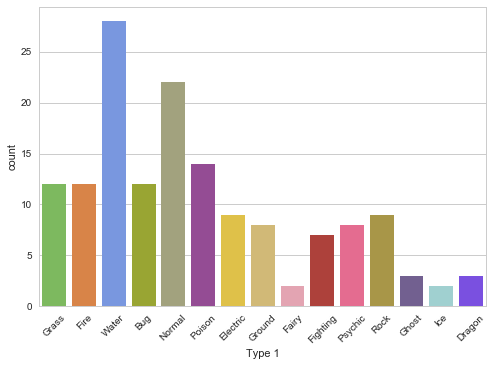

In [44]:
# Rotate x-labels
plt.xticks(rotation=45)

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

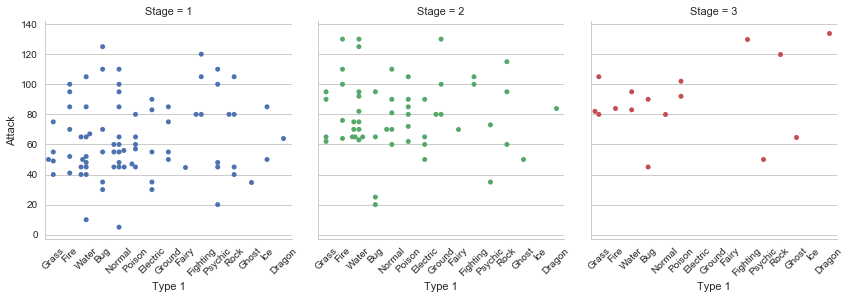

In [36]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

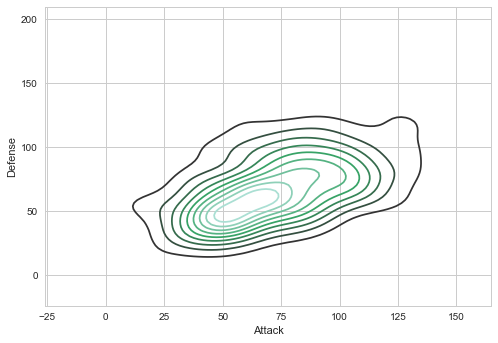

In [37]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

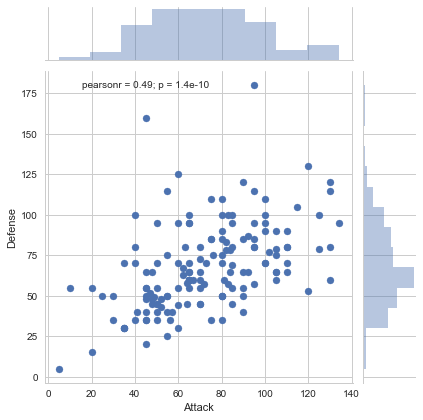

In [40]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)